# C1 - Exploratory data analysis

In [40]:
# !pip3 install wquantiles pandas numpy scikit-learn

In [70]:
import pandas as pd
from scipy.stats import trim_mean
import numpy as np
import wquantiles
import matplotlib
import seaborn as sns

In [43]:
file_path = '../../data/state.csv'
state = pd.read_csv(file_path)

## Estimates of location

In [44]:
state['Population'].mean()

np.float64(6162876.3)

In [45]:
trim_mean(state['Population'], 0.1)

np.float64(4783697.125)

In [46]:
state['Population'].median()

np.float64(4436369.5)

In [47]:
np.average(state['Murder.Rate'],weights=state['Population'])

np.float64(4.445833981123393)

In [48]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

np.float64(4.4)

## Estimates of variability

In [49]:
state['Population'].std()

np.float64(6848235.347401142)

In [50]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

np.float64(4847308.0)

In [51]:
from statsmodels import robust

In [52]:
robust.scale.mad(state['Population'])

np.float64(3849876.1459979336)

## Exploring the data distribution

In [53]:
state['Murder.Rate'].quantile([.05,0.25,.5,.75,.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

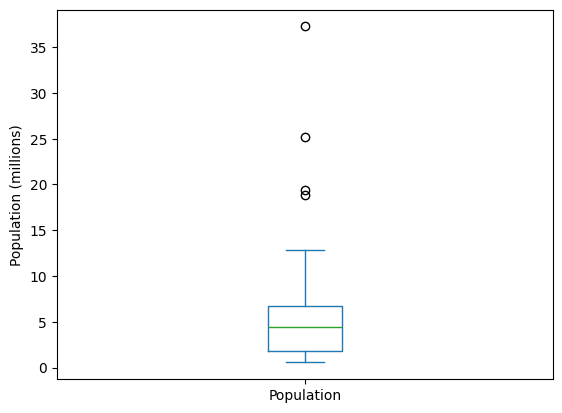

In [54]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

In [55]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

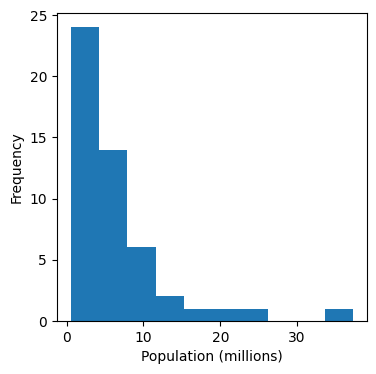

In [56]:
ax = (state['Population']/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100000)')

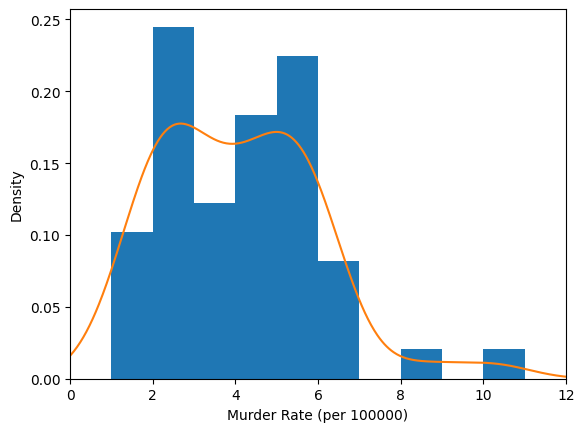

In [57]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100000)')

## Exploring binary and categorical data

In [58]:
dfw_file_path = '../../data/dfw_airline.csv'
dfw = pd.read_csv(dfw_file_path)

Text(0, 0.5, 'Count')

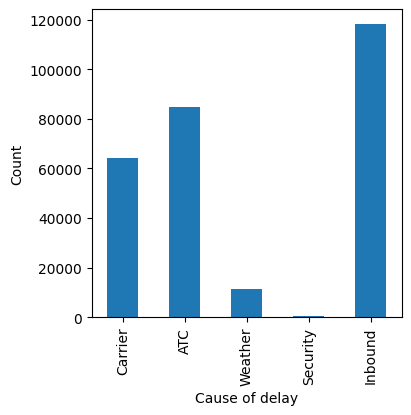

In [59]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

## Correlation

In [65]:
sp500_px_file_path = '../../data/sp500_data.csv.gz'
sp500_px = pd.read_csv(sp500_px_file_path, parse_dates=True, index_col=0)

In [62]:
sp500_sym_file_path = '../../data/sp500_sectors.csv'
sp500_sym = pd.read_csv(sp500_sym_file_path)

<Axes: >

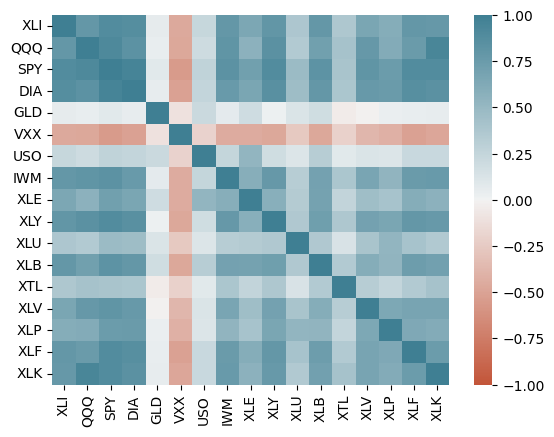

In [71]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] =='etf']['symbol']]
sns.heatmap(etfs.corr(),vmin=-1,vmax=1,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

In [72]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

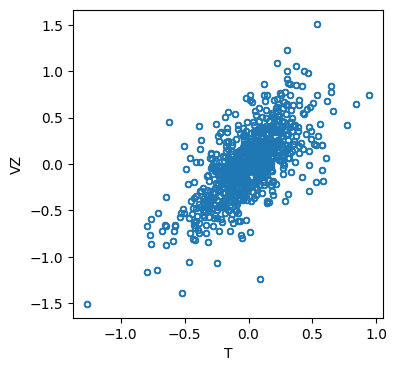

In [ ]:
ax =telecom.plot.scatter(x='T',y='VZ',figsize=(4,4),marker='$\u25EF$')
